In [24]:
import pandas as pd

# Path to your merged CSV
folder_path = "C:/Users/tanvi/Desktop/421dataset/Merged1to30.csv"

# Load it
full_df = pd.read_csv(folder_path)

# Check the shape
print("Full DataFrame loaded. Shape:", full_df.shape)

full_df.head()

Full DataFrame loaded. Shape: (462435, 40)


,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,19.92,6,63.36,25893.962218,0.0,0.0,0.0,0.99,0.99,0.0,...,6421,60,481,64.21,42.100000,64.21,0.000039,100,1772.410000,DDOS-PSHACK_FLOOD
1,0.00,47,64.00,3703.841331,0.0,0.0,0.0,0.00,0.00,0.0,...,57320,98,578,573.20,48.000000,573.20,0.000271,100,2304.000000,MIRAI-GREIP_FLOOD
2,7.92,17,65.91,19673.095685,0.0,0.0,0.0,0.00,0.00,0.0,...,6010,60,70,60.10,1.000000,60.10,0.000057,100,1.000000,DOS-UDP_FLOOD
3,20.40,6,110.50,261.664826,0.1,0.0,0.3,0.20,0.40,0.0,...,2223,54,1500,222.30,451.596686,222.30,0.004766,10,203939.566667,DNS_SPOOFING
4,0.32,1,63.96,28944.199848,0.0,0.0,0.0,0.00,0.01,0.0,...,6006,60,66,60.06,0.600000,60.06,0.000035,100,0.360000,DDOS-ICMP_FLOOD


In [25]:
# Check how many NaNs are in each column
print(full_df.isnull().sum())  # Output for all was 0 except variance was missing in 10 rows

# Drop rows where 'Variance' is missing
full_df = full_df.dropna(subset=['Variance'])

Header_Length       0
Protocol Type       0
Time_To_Live        0
Rate                0
fin_flag_number     0
syn_flag_number     0
rst_flag_number     0
psh_flag_number     0
ack_flag_number     0
ece_flag_number     0
cwr_flag_number     0
ack_count           0
syn_count           0
fin_count           0
rst_count           0
HTTP                0
HTTPS               0
DNS                 0
Telnet              0
SMTP                0
SSH                 0
IRC                 0
TCP                 0
UDP                 0
DHCP                0
ARP                 0
ICMP                0
IGMP                0
IPv                 0
LLC                 0
Tot sum             0
Min                 0
Max                 0
AVG                 0
Std                10
Tot size            0
IAT                 0
Number              0
Variance           10
Label               0
dtype: int64


In [42]:
# This cell is for fixing the data and getting rid of null values
from sklearn.preprocessing import LabelEncoder


# Before dropping duplicate rows
print("Before dropping duplicates:", full_df.shape)

# Drop duplicate rows
full_df = full_df.drop_duplicates()

# After dropping duplicate rows
print("After dropping duplicates:", full_df.shape)


# Create LabelEncoder object
le = LabelEncoder()

# Create a new column "Label_encoded"
full_df['Label_encoded'] = le.fit_transform(full_df['Label'])

# See the unique labels mapped to numbers
print(dict(zip(le.classes_, le.transform(le.classes_))))




Before dropping duplicates: (373966, 41)
After dropping duplicates: (373966, 41)
{'BACKDOOR_MALWARE': np.int64(0), 'BENIGN': np.int64(1), 'BROWSERHIJACKING': np.int64(2), 'COMMANDINJECTION': np.int64(3), 'DDOS-ACK_FRAGMENTATION': np.int64(4), 'DDOS-HTTP_FLOOD': np.int64(5), 'DDOS-ICMP_FLOOD': np.int64(6), 'DDOS-ICMP_FRAGMENTATION': np.int64(7), 'DDOS-PSHACK_FLOOD': np.int64(8), 'DDOS-RSTFINFLOOD': np.int64(9), 'DDOS-SLOWLORIS': np.int64(10), 'DDOS-SYNONYMOUSIP_FLOOD': np.int64(11), 'DDOS-SYN_FLOOD': np.int64(12), 'DDOS-TCP_FLOOD': np.int64(13), 'DDOS-UDP_FLOOD': np.int64(14), 'DDOS-UDP_FRAGMENTATION': np.int64(15), 'DICTIONARYBRUTEFORCE': np.int64(16), 'DNS_SPOOFING': np.int64(17), 'DOS-HTTP_FLOOD': np.int64(18), 'DOS-SYN_FLOOD': np.int64(19), 'DOS-TCP_FLOOD': np.int64(20), 'DOS-UDP_FLOOD': np.int64(21), 'MIRAI-GREETH_FLOOD': np.int64(22), 'MIRAI-GREIP_FLOOD': np.int64(23), 'MIRAI-UDPPLAIN': np.int64(24), 'MITM-ARPSPOOFING': np.int64(25), 'RECON-HOSTDISCOVERY': np.int64(26), 'RECON-OSS

<class 'pandas.core.frame.DataFrame'>
Index: 373966 entries, 0 to 462434
Data columns (total 41 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    373966 non-null  float64
 1   Protocol Type    373966 non-null  int64  
 2   Time_To_Live     373966 non-null  float64
 3   Rate             373966 non-null  float64
 4   fin_flag_number  373966 non-null  float64
 5   syn_flag_number  373966 non-null  float64
 6   rst_flag_number  373966 non-null  float64
 7   psh_flag_number  373966 non-null  float64
 8   ack_flag_number  373966 non-null  float64
 9   ece_flag_number  373966 non-null  float64
 10  cwr_flag_number  373966 non-null  float64
 11  ack_count        373966 non-null  int64  
 12  syn_count        373966 non-null  int64  
 13  fin_count        373966 non-null  int64  
 14  rst_count        373966 non-null  int64  
 15  HTTP             373966 non-null  float64
 16  HTTPS            373966 non-null  float64
 

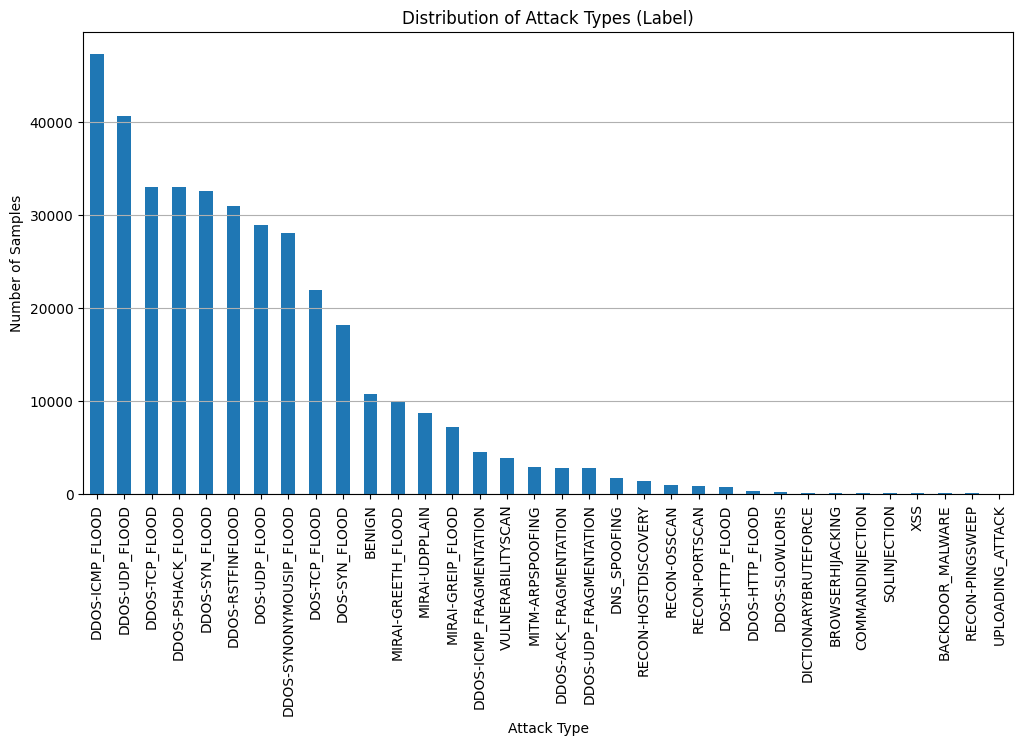

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Exploratory Data Analysis cell

# Basic info
full_df.info()

# Statistical description of numeric features
full_df.describe()


# Replace inf with NaN
full_df.replace([np.inf, -np.inf], np.nan, inplace=True)


# Drop rows with NaN
full_df.dropna(inplace=True)

# Check new shape
print("New shape after removing infinities:", full_df.shape)


# Count of each attack type
print(full_df['Label'].value_counts()) # Shows the severe class imbalance

# Plot class distribution
full_df['Label'].value_counts().plot(kind='bar', figsize=(12,6))

plt.title('Distribution of Attack Types (Label)')
plt.xlabel('Attack Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Creates a correlation matrix. GPT gave this don't really know why we need it but it's there
# Drop non-numeric columns
# numeric_df = full_df.drop(['Label', 'Label_encoded'], axis=1)

# # Calculate correlation matrix
# corr_matrix = numeric_df.corr()

# # Plot the heatmap
# plt.figure(figsize=(15,12))
# sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
# plt.title('Feature Correlation Heatmap')
# plt.show()


# # Plot histograms for a few features, don't really know if we need this but its also there
# features_to_plot = ['Header_Length', 'Rate', 'Tot sum', 'IAT']

# full_df[features_to_plot].hist(figsize=(12,8), bins=30)
# plt.suptitle('Feature Distributions')
# plt.show()



X shape: (373966, 39)
y shape: (373966,)
Train set shape: (299172, 39)
Test set shape: (74794, 39)
After SMOTE, X_train shape: (1286254, 39)
After SMOTE, y_train shape: (1286254,)


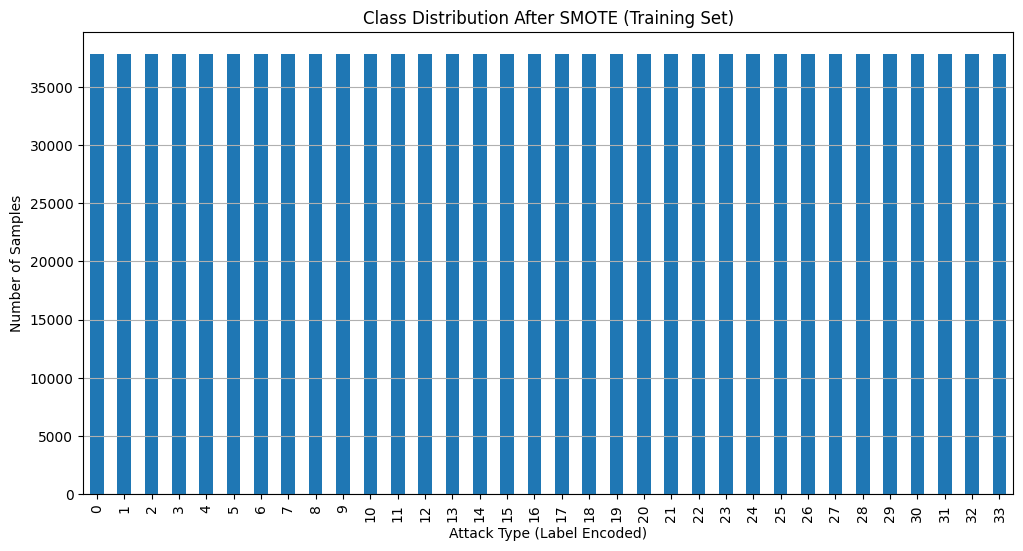

In [49]:
# This cell is for handling the class imbalances that we found earlier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# X = features (drop Label and Label_encoded)
X = full_df.drop(['Label', 'Label_encoded'], axis=1)

# y = target (Label_encoded)
y = full_df['Label_encoded']

print("X shape:", X.shape)
print("y shape:", y.shape)


# 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE ONLY to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE, X_train shape:", X_train_smote.shape)
print("After SMOTE, y_train shape:", y_train_smote.shape)


import matplotlib.pyplot as plt

# Plot new class distribution after SMOTE
pd.Series(y_train_smote).value_counts().sort_index().plot(kind='bar', figsize=(12,6))

plt.title('Class Distribution After SMOTE (Training Set)')
plt.xlabel('Attack Type (Label Encoded)')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()




Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.40      0.29         5
           1       0.79      0.73      0.76      2151
           2       0.21      0.27      0.24        11
           3       0.20      0.30      0.24        10
           4       0.98      0.99      0.98       564
           5       0.50      0.57      0.53        51
           6       1.00      1.00      1.00      9458
           7       0.98      0.98      0.98       898
           8       1.00      1.00      1.00      6589
           9       1.00      1.00      1.00      6176
          10       0.59      0.68      0.63        47
          11       0.38      0.40      0.39      5603
          12       0.39      0.37      0.38      6511
          13       0.59      0.58      0.59      6592
          14       0.69      0.68      0.68      8124
          15       0.97      0.99      0.98       560
          16       0.08      0.15      0.11 

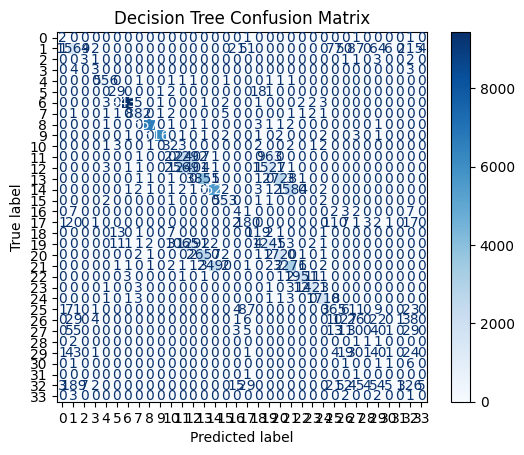

KeyboardInterrupt: 

In [50]:
# This cell is for actually training and evaluating the models

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()


# Train
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Purples')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Train
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Greens')
plt.title('KNN Confusion Matrix')
plt.show()


# Get feature importances
importances = dt_model.feature_importances_

# Turn into DataFrame for easy plotting
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.bar(importances_df['Feature'][:10], importances_df['Importance'][:10])
plt.xticks(rotation=90)
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.grid()
plt.show()

